In [6]:
df=pd.read_csv('gs://cohort5_mlopstraining/data/diabetes.csv')


--- Basic Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

--- First 5 Rows ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66    

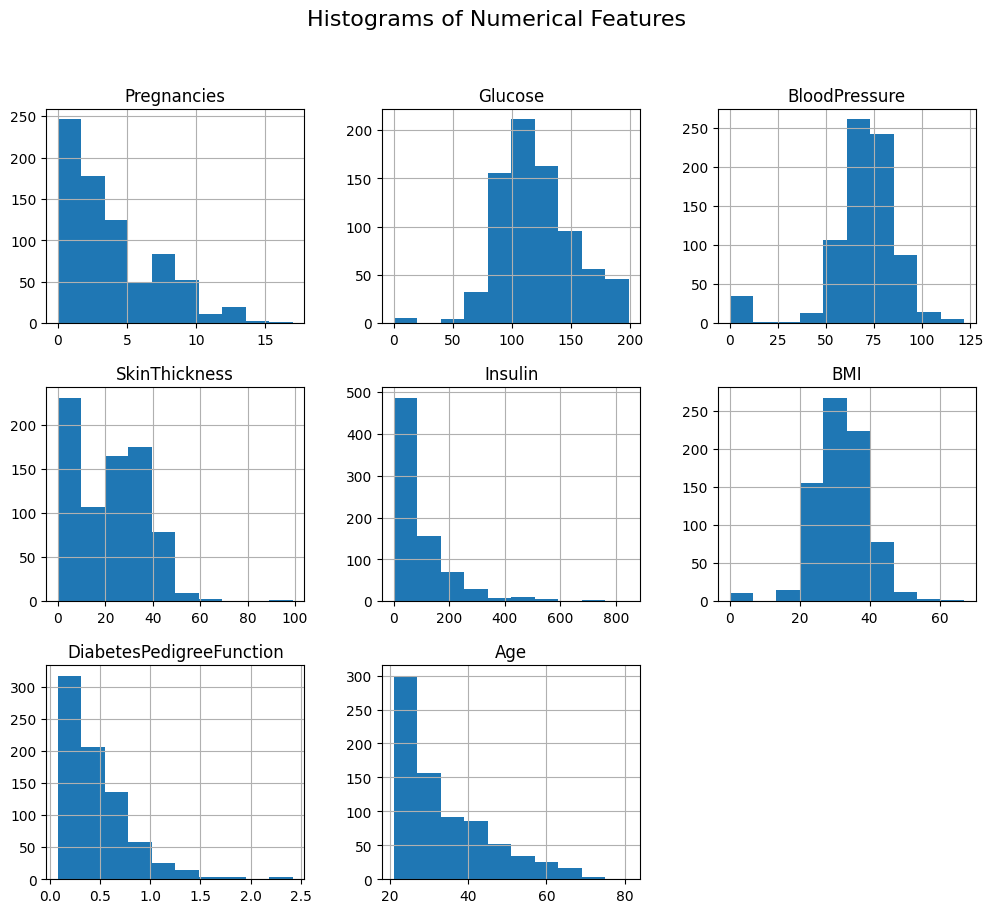


--- Box Plots ---


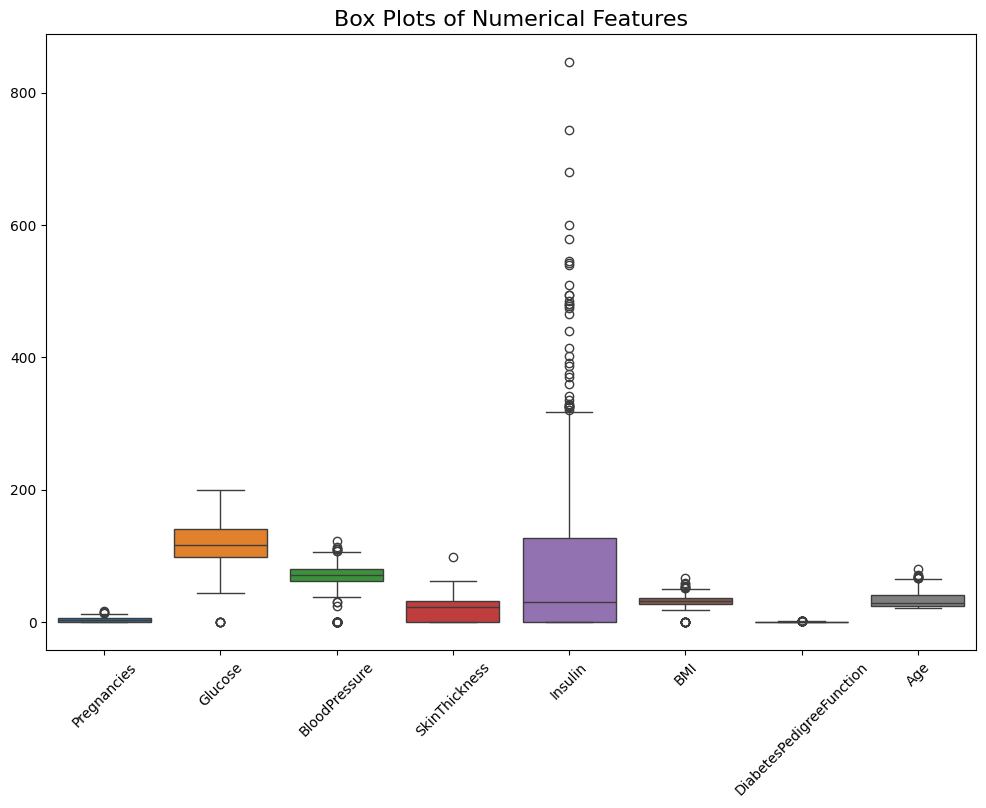


--- Outcome Distribution ---


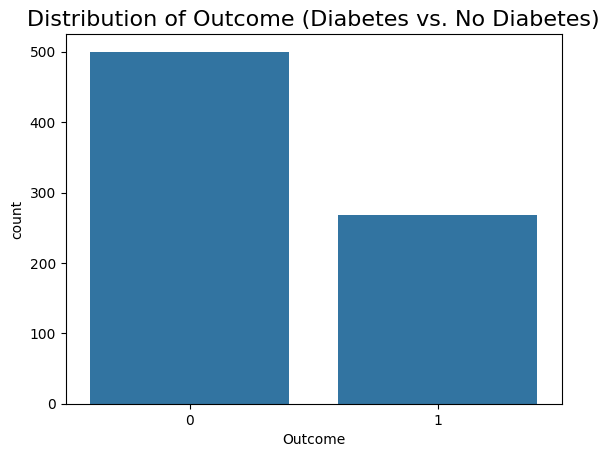


--- Pairplot (Sampled) ---


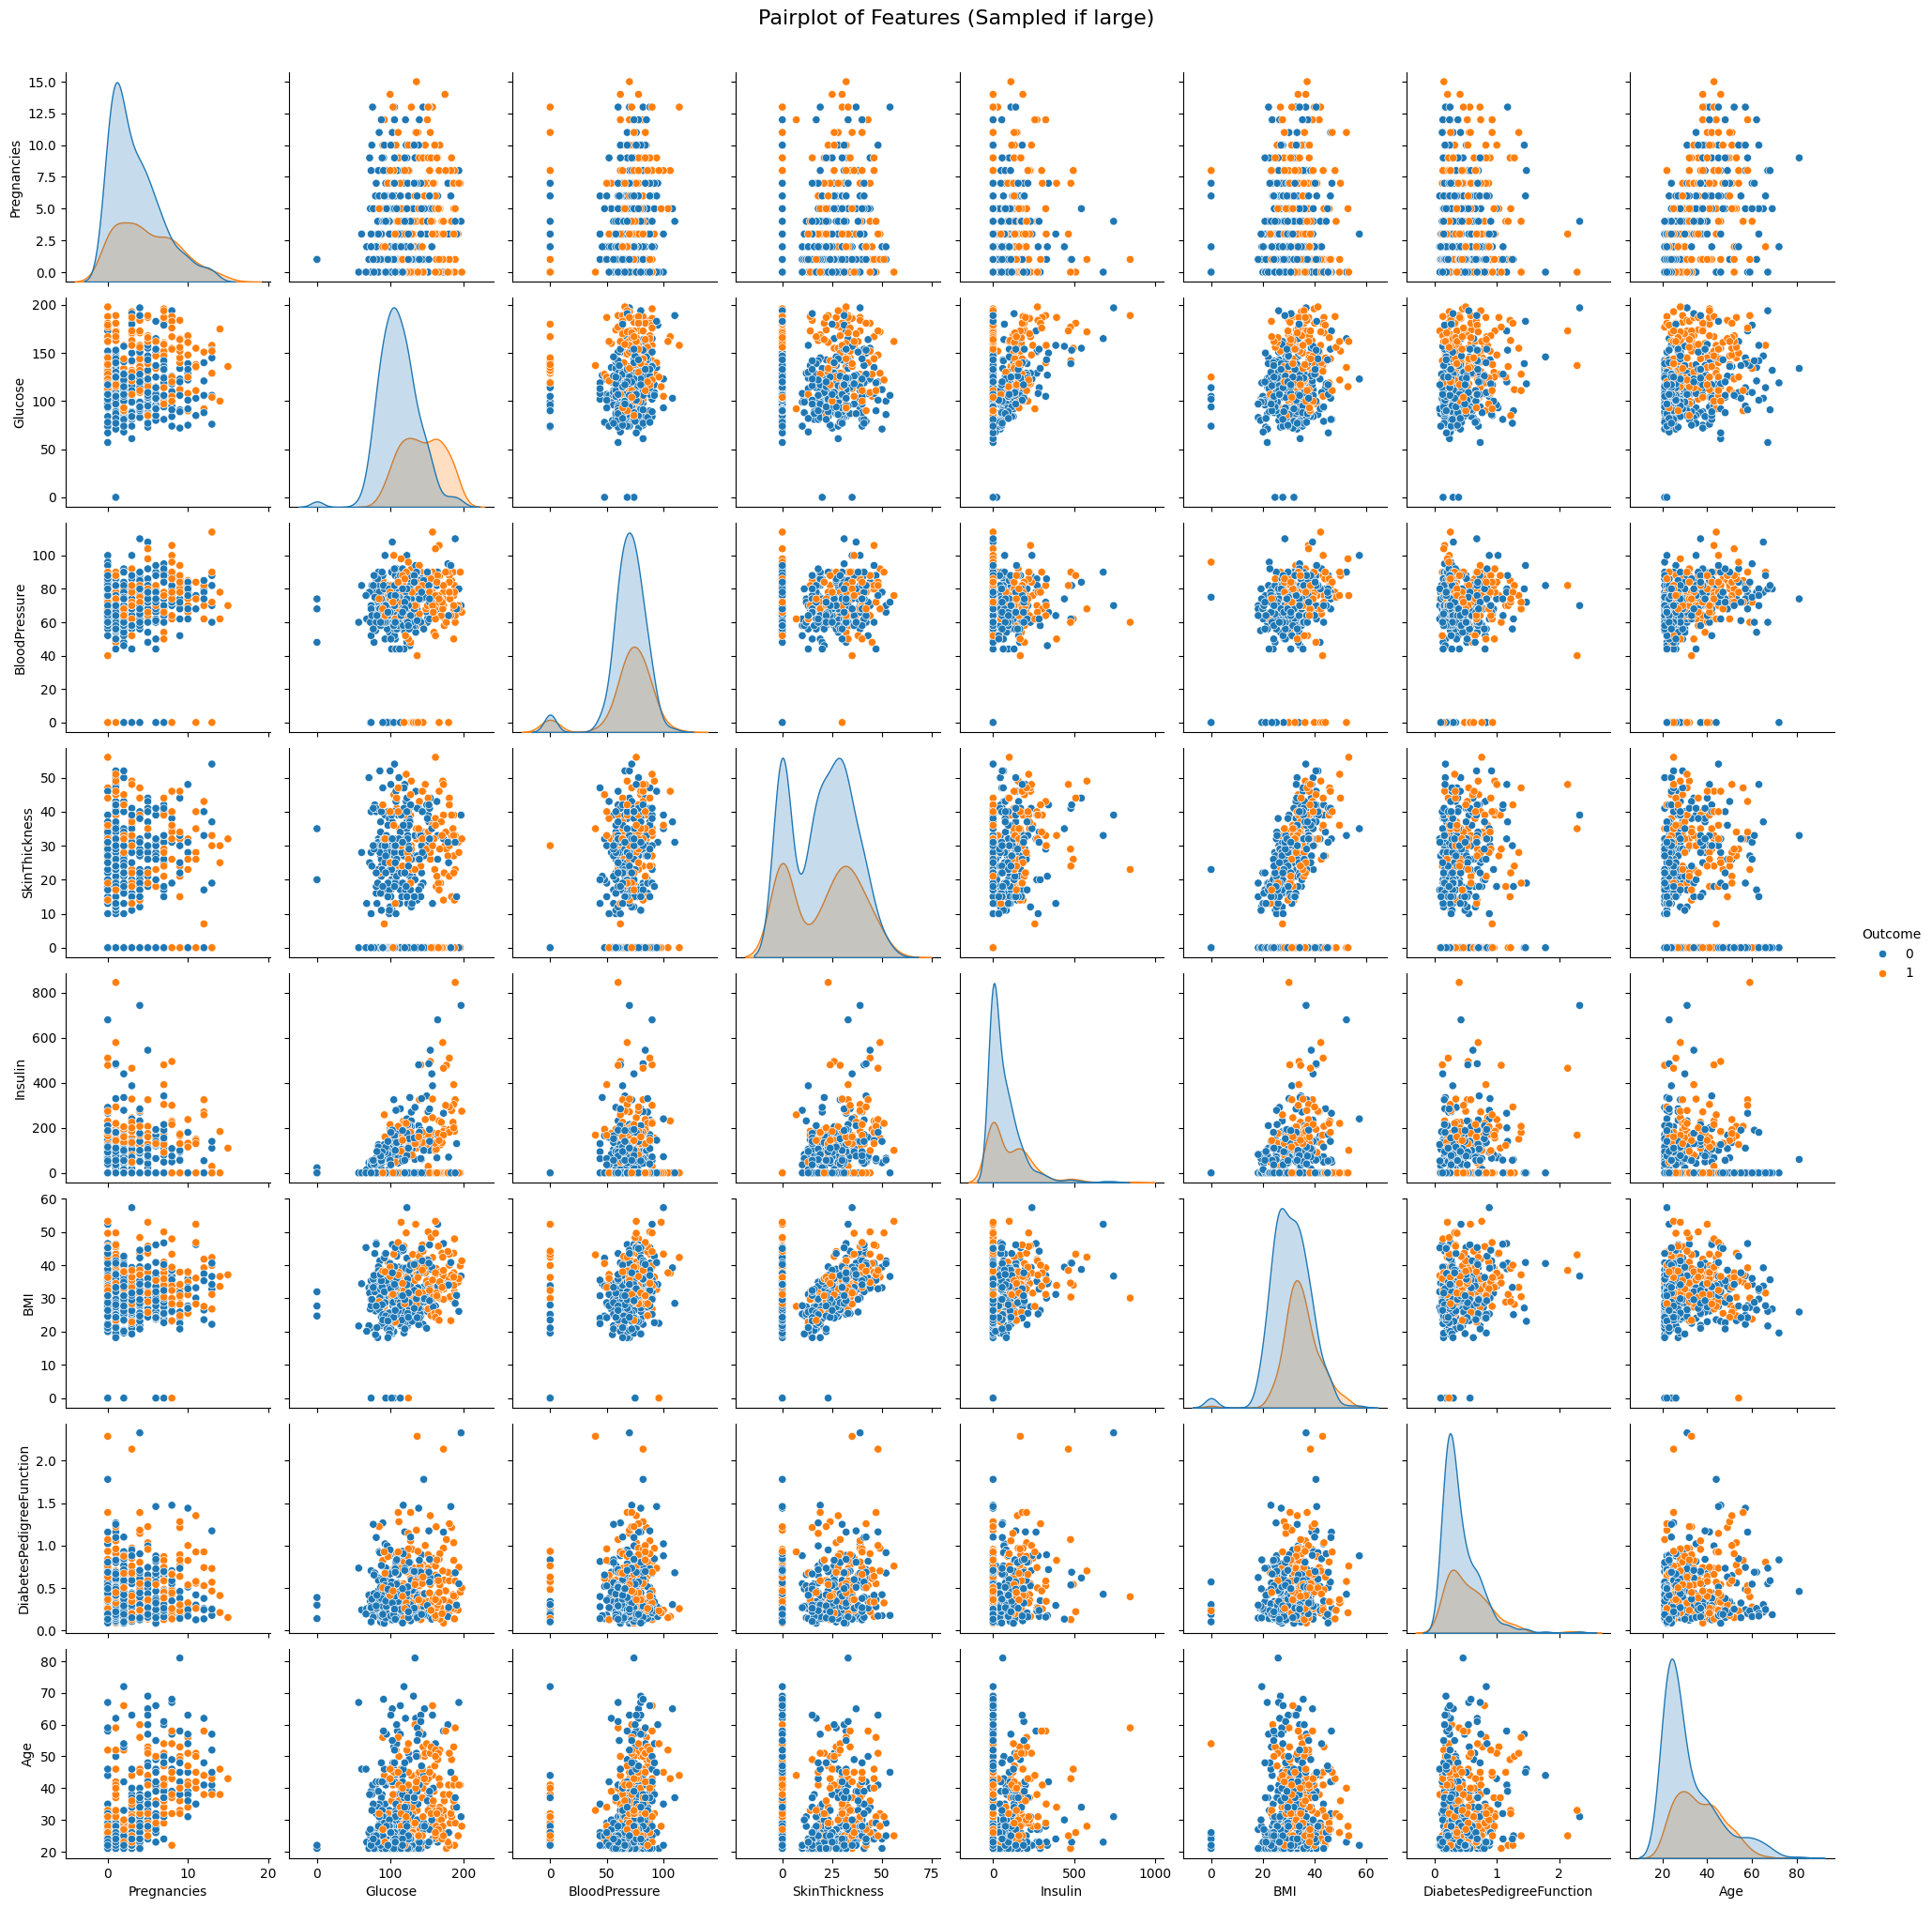


--- Correlation Heatmap ---


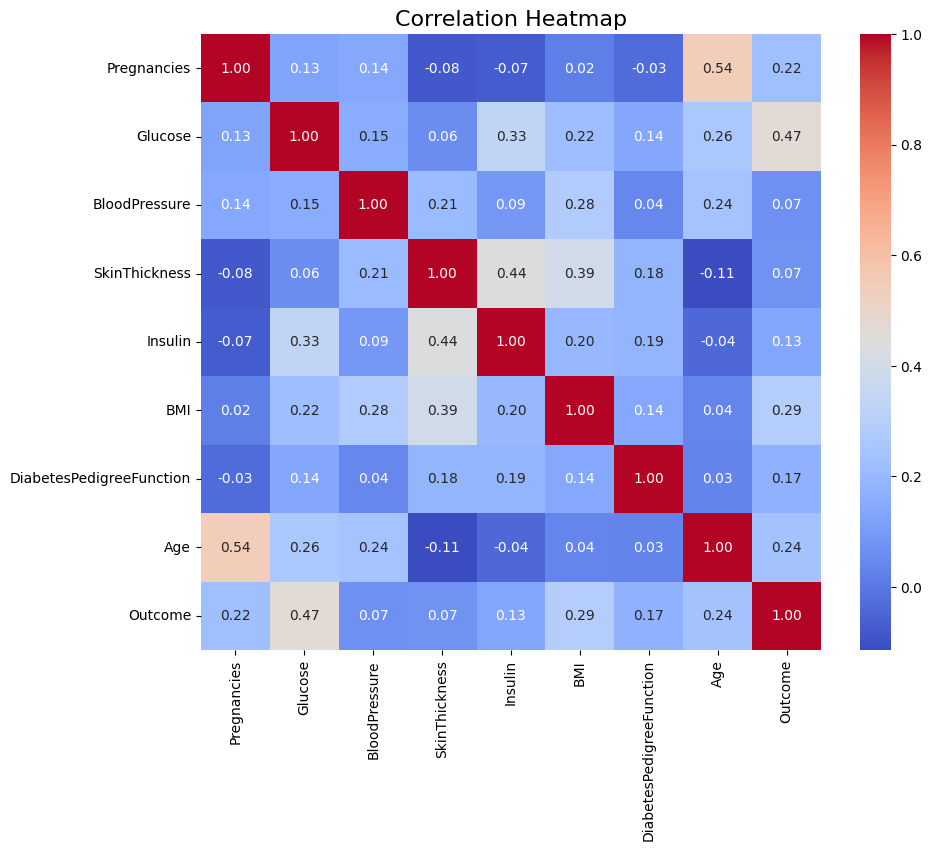


--- Outlier Detection (IQR Method) ---

Outliers in Pregnancies:
88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64

Outliers in Glucose:
75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

Outliers in BloodPressure:
7        0
15       0
18      30
43     110
49       0
60       0
78       0
81       0
84     108
106    122
125     30
172      0
177    110
193      0
222      0
261      0
266      0
269      0
300      0
332      0
336      0
347      0
357      0
362    108
426      0
430      0
435      0
453      0
468      0
484      0
494      0
522      0
533      0
535      0
549    110
589      0
597     24
601      0
604      0
619      0
643      0
691    114
697      0
703      0
706      0
Name: BloodPressure, dtype: int64

Outliers in SkinThickness:
579    99
Name: SkinThickness, dtype: int64

Outliers in Insulin:
8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247   

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. Basic Information ---
print("\n--- Basic Information ---")
print(df.info())
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Descriptive Statistics ---")
print(df.describe())

# --- 2. Missing Values ---
print("\n--- Missing Values ---")
print(df.isnull().sum())  # Check for missing values in each column

# --- 3. Data Visualization ---

# Histograms for numerical features
print("\n--- Histograms ---")
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                      'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numerical_features].hist(figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


# Box plots for numerical features
print("\n--- Box Plots ---")
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_features], orient="v")
plt.title("Box Plots of Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()


# Outcome distribution
print("\n--- Outcome Distribution ---")
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome (Diabetes vs. No Diabetes)", fontsize=16)
plt.show()


# Pairplot (scatter plots for all pairs of features) -  Can be computationally expensive for large datasets
print("\n--- Pairplot (Sampled) ---")
if len(df) > 500: # Sample if the dataset is large to avoid performance issues
    sns.pairplot(df.sample(n=500), hue='Outcome', diag_kind='kde')
else:
    sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle("Pairplot of Features (Sampled if large)", fontsize=16, y=1.02)
plt.show()


# Correlation heatmap
print("\n--- Correlation Heatmap ---")
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


# --- 4. Outlier Detection (using IQR method) ---
print("\n--- Outlier Detection (IQR Method) ---")
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    print(f"\nOutliers in {feature}:")
    if not outliers.empty:
        print(outliers)
    else:
        print("No outliers detected.")

print("\n--- EDA Completed ---")
